In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [35]:
df_train = pd.read_csv('../../dataset/processed/masrapi/clear_train_fill.csv',index_col=0)
df_test = pd.read_csv('../../dataset/processed/masrapi/clear_test_fill.csv',index_col=0)

In [36]:
df_train.describe(include='O')

,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,type_of_reinforcement_concrete,residential_type,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
count,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607,301607
unique,6,5,9,6,4,10,4,4,4,5,2,9,3,2,6,4
top,clay sand mixed mortar-stone/brick,bamboo or timber light roof,clay,timber mud or bamboo-mud,Not attached,Rectangular,Reconstruction,Private,No reinforcement concrete,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks
freq,124529,139695,202937,169267,239044,289551,182496,289344,284897,287176,301038,279643,301523,277406,242935,244058


In [37]:
land_surface_condition_dict = {
    'Flat' : 0,
    'Moderate slope':1,
    'Steep slope':2
}
df_train.land_surface_condition = df_train.land_surface_condition.replace(land_surface_condition_dict)
df_test.land_surface_condition = df_test.land_surface_condition.replace(land_surface_condition_dict)

In [38]:
position_dict = {
    'Not attached':0,
    'Attached-1 side':1,
    'Attached-2 side':2,
    'Attached-3 side':3,
}
df_train.position = df_train.position.replace(position_dict)
df_test.position = df_test.position.replace(position_dict)

In [39]:
technical_solution_proposed_dict = {
    'No need':0,
    'Minor repair':1,
    'Major repair':2,
    'Reconstruction':3,
}
df_train.technical_solution_proposed = df_train.technical_solution_proposed.replace(technical_solution_proposed_dict)
df_test.technical_solution_proposed = df_test.technical_solution_proposed.replace(technical_solution_proposed_dict)

In [40]:
industrial_use_type_dict = {
    'Farm':'Others',
    'Forest-based':'Others',
    'Agro':'Others',
    'Metallurgy':'Others'
}
df_train.industrial_use_type = df_train.industrial_use_type.replace(industrial_use_type_dict)
df_test.industrial_use_type = df_test.industrial_use_type.replace(industrial_use_type_dict)

In [41]:
building_plan_configuration_dict = {
    'Multi-projected':'Others',
    'T-shape':'Others',
    'U-shape':'Others',
    'E-shape':'Others',
    'H-shape':'Others',
    'Building with Central Courtyard':'Others',
}
df_train.building_plan_configuration = df_train.building_plan_configuration.replace(building_plan_configuration_dict)
df_test.building_plan_configuration = df_test.building_plan_configuration.replace(building_plan_configuration_dict)

In [42]:
type_of_ground_floor_dict = {
    'lumber':'other',
    'timber':'other',
    'wood':'other',
}
df_train.type_of_ground_floor = df_train.type_of_ground_floor.replace(type_of_ground_floor_dict)
df_test.type_of_ground_floor = df_test.type_of_ground_floor.replace(type_of_ground_floor_dict)

In [43]:
# legal_ownership_status_dict = {
#     'Private':0,
#     'Institutional':1,
#     'Other':1,
#     'Public':1,
# }
# df_train.legal_ownership_status = df_train.legal_ownership_status.replace(legal_ownership_status_dict)
# df_test.legal_ownership_status = df_test.legal_ownership_status.replace(legal_ownership_status_dict)

In [44]:
df_train.legal_ownership_status.value_counts()

Private          289344
Public             7686
Institutional      3085
Other              1492
Name: legal_ownership_status, dtype: int64

In [45]:
public_place_type_dict = {
    'Non-public':0,
    'Public':1,
}
df_train.public_place_type = df_train.public_place_type.replace(public_place_type_dict)
df_test.public_place_type = df_test.public_place_type.replace(public_place_type_dict)

In [46]:
flexible_superstructure_dict = {
    'unavailable':0,
    'available':1,
}
df_train.flexible_superstructure = df_train.flexible_superstructure.replace(flexible_superstructure_dict)
df_test.flexible_superstructure = df_test.flexible_superstructure.replace(flexible_superstructure_dict)

In [47]:
# type_of_foundation_dict = {
#     # 'clay sand mixed mortar-stone/brick':'traditional',
#     # 'clay mortar-stone/brick':'traditional',
#     # 'bamboo or timber':'traditional',
#     # 'cement-stone/brick':'modern',
#     # 'reinforced concrete':'modern',
#     'reinforced concrete': 'strong',
#     'cement-stone/brick' : 'relatively strong',
#     'bamboo or timber' : 'relatively strong',
#     'clay mortar-stone/brick' : 'weak',
#     'clay sand mixed mortar-stone/brick' : 'weak',
    
# }
# df_train.type_of_foundation = df_train.type_of_foundation.replace(type_of_foundation_dict)
# df_test.type_of_foundation = df_test.type_of_foundation.replace(type_of_foundation_dict)
# type_of_roof_dict = {
#     # 'bamboo or timber light roof':0,
#     # 'wood light roof or bamboo Heavy roof':0,
#     # 'wood light roof or bamboo light roof':0,
#     # 'bamboo/timber Heavy roof':0,
#     # 'rcc/rb/rbc':1,
#     'rcc/rb/rbc':2,
#     'bamboo/timber heavy roof' :1,
#     'wood light roof or bamboo heavy roof' : 1,
#     'bamboo or timber light roof' : 0,
#     'wood light roof or bamboo light roof' : 0,
    
# }
# df_train.type_of_roof = df_train.type_of_roof.replace(type_of_roof_dict)
# df_test.type_of_roof = df_test.type_of_roof.replace(type_of_roof_dict)
# type_of_ground_floor_dict = {
#     'clay':'weak',
#     'mud':'weak',
#     'soil, water, loam mixed':'weak',
#     'brick or stone':'relatively strong',
#     'reinforced concrete':'strong',
    
# }
# df_train.type_of_ground_floor = df_train.type_of_ground_floor.replace(type_of_ground_floor_dict)
# df_test.type_of_ground_floor = df_test.type_of_ground_floor.replace(type_of_ground_floor_dict)
# type_of_other_floor_dict = {
#     'not applicable':0,
#     'wood-mud or bamboo mud':0,
#     'wood-mud/bamboo-mud':0,
#     'timber mud or bamboo-mud':1,
#     'wood-plank':1,
#     'timber-plank':1,
#     'reinforced cement concrete/rb/rbc':2,
#     # 
# }
# df_train.type_of_other_floor = df_train.type_of_other_floor.replace(type_of_other_floor_dict)
# df_test.type_of_other_floor = df_test.type_of_other_floor.replace(type_of_other_floor_dict)
# residential_type_dict = {
#     'Non-residential':0,
#     'Hotel/Motel':1,
#     'Rental Residential':1,
#     'Housing':1,
#     'Other':1,    
# }
# df_train.residential_type = df_train.residential_type.replace(residential_type_dict)
# df_test.residential_type = df_test.residential_type.replace(residential_type_dict)
# industrial_use_type_dict = {
#     'Non-industrial':0,
#     'Food':1,
#     'Service/Tourism':1,
#     'Manufacturing':1,
#     'Infrastructure':1,    
#     'Others':1,    
# }
# df_train.industrial_use_type = df_train.industrial_use_type.replace(industrial_use_type_dict)
# df_test.industrial_use_type = df_test.industrial_use_type.replace(industrial_use_type_dict)
# govermental_use_type_dict = {
#     'Non-govermental':0,
#     'Police Offices':1,
#     'Govermental Buildings':1,
# }
# df_train.govermental_use_type = df_train.govermental_use_type.replace(govermental_use_type_dict)
# df_test.govermental_use_type = df_test.govermental_use_type.replace(govermental_use_type_dict)

<Axes: ylabel='Frequency'>

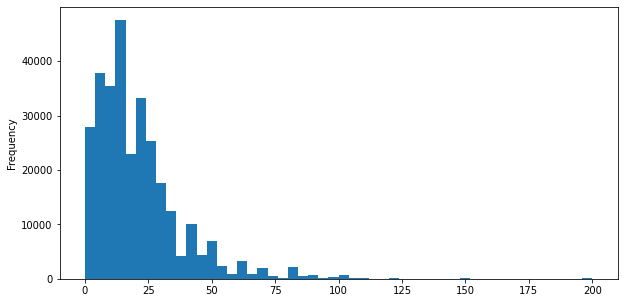

In [74]:
# drop old_building that is more than 500 years old
df_train.drop(df_train["old_building"][df_train["old_building"] > 500].index, inplace=True)
df_train["old_building"].plot(kind="hist", bins=50, figsize=(10, 5))

<Axes: ylabel='Frequency'>

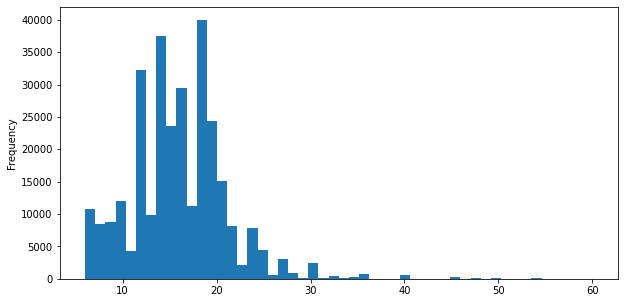

In [75]:
df_train.drop(
    df_train["height_before_eq (ft)"][df_train["height_before_eq (ft)"] > 60].index, inplace=True)
df_train["height_before_eq (ft)"].plot(kind="hist", bins=50, figsize=(10, 5))

In [76]:
X = df_train.drop('damage_grade',axis=1)
y = df_train.damage_grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69420, stratify=y)

In [77]:
X_train.describe(include='O')

,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,building_plan_configuration,legal_ownership_status,type_of_reinforcement_concrete,residential_type,industrial_use_type,govermental_use_type,wall_binding,wall_material
count,225135,225135,225135,225135,225135,225135,225135,225135,225135,225135,225135,225135
unique,6,5,6,6,4,4,4,5,6,3,6,4
top,clay mortar-stone/brick,bamboo or timber light roof,clay,timber mud or bamboo-mud,Rectangular,Private,No reinforcement concrete,Non-residential,Non-industrial,Non-govermental,"Mud + Mortar,Clay",Stone Bricks
freq,92859,104320,151412,126237,216173,216041,212565,214330,208839,225065,181332,182231


In [78]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
Counter(y_train)

Counter({5.0: 81444, 3.0: 40396, 1.0: 23390, 2.0: 25617, 4.0: 54288})

In [79]:
# Initialize a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Apply under-sampling to the training data only
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [80]:
# new_train_pd_dummies = pd.get_dummies(X_train_resampled[['type_of_foundation','type_of_roof']])
# X_train_resampled.drop(['type_of_foundation','type_of_roof'],axis=1,inplace=True)

# new_test_pd_dummies = pd.get_dummies(X_test[['type_of_foundation','type_of_roof']])
# X_test.drop(['type_of_foundation','type_of_roof'],axis=1,inplace=True)


# new_df_test = pd.get_dummies(df_test[['type_of_foundation','type_of_roof']])
# df_test.drop(['type_of_foundation','type_of_roof'],axis=1,inplace=True)

# X_train_resampled = pd.concat([X_train_resampled,new_train_pd_dummies],axis=1)
# X_test = pd.concat([X_test,new_test_pd_dummies],axis=1)
# df_test = pd.concat([df_test,new_df_test],axis=1)

In [81]:
# cat

In [82]:
cat = X_train_resampled.describe(include='O').columns

In [83]:
import category_encoders as ce


encoder = ce.TargetEncoder(return_df=True)
X_train_resampled_loo = encoder.fit_transform(X_train_resampled[cat], y_train_resampled)

X_train_resampled[cat] = X_train_resampled_loo

X_test_loo = encoder.transform(X_test[cat])

X_test[cat] = X_test_loo


df_test_loo = encoder.transform(df_test[cat])

df_test[cat] = df_test_loo

In [84]:
from lightgbm import LGBMClassifier

l = LGBMClassifier(random_state=69420)
l.fit(X_train_resampled, y_train_resampled)

y_pred = l.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.8132257864111704


In [ ]:
import optuna

def lgbm_objective(trial):

    params = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 5,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    l = LGBMClassifier(**params, random_state=69420)
    l.fit(X_train_resampled, y_train_resampled)

    y_pred = l.predict(X_test)

    return f1_score(y_test, y_pred, average="macro")


l_study = optuna.create_study(direction='maximize')
l_study.optimize(lgbm_objective, n_trials=1000, n_jobs=6,
                 timeout=60*15, show_progress_bar=True)


In [87]:
l_study.best_params

{'lambda_l1': 0.27941843683241274,
 'lambda_l2': 1.2413509990278071e-06,
 'num_leaves': 70,
 'feature_fraction': 0.47976414906187437,
 'bagging_fraction': 0.9907934291779357,
 'bagging_freq': 7,
 'min_child_samples': 52}

In [104]:
params = {'lambda_l1': 0.27941843683241274,
          'lambda_l2': 1.2413509990278071e-06,
          'num_leaves': 70,
          'feature_fraction': 0.47976414906187437,
          'bagging_fraction': 0.9907934291779357,
          'bagging_freq': 7,
          'min_child_samples': 52}

model = LGBMClassifier(**params, random_state=69420)
model.fit(X_train_resampled, y_train_resampled)

print(f1_score(y_test, model.predict(X_test), average='macro'))

[LightGBM] [Warning] feature_fraction is set=0.47976414906187437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47976414906187437
[LightGBM] [Warning] lambda_l1 is set=0.27941843683241274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27941843683241274
[LightGBM] [Warning] bagging_fraction is set=0.9907934291779357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9907934291779357
[LightGBM] [Warning] lambda_l2 is set=1.2413509990278071e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2413509990278071e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
0.8169127175694791


In [105]:
hasil = model.predict(df_test.drop('id',axis=1))
hasil = pd.DataFrame(hasil,index=df_test.id,columns=['damage_grade']).reset_index()
hasil.damage_grade = hasil.damage_grade.astype('int32')
hasil

,id,damage_grade
0,0,4
1,1,4
2,2,4
3,3,4
4,4,2
...,...,...
242077,242077,3
242078,242078,5
242079,242079,1
242080,242080,4


In [90]:
hasil.to_csv('../../dataset/submission_hasil9_lgbm.csv',index=False)

In [107]:
mas = pd.read_csv("../../dataset/hasil9.csv")

In [108]:
np.sum(hasil["damage_grade"] != mas["damage_grade"])


71192